In [1]:
import pandas as pd
import numpy as np

# Define the number of rows
num_rows = 10

# Locations
locations = ['Vancouver', 'Calgary', 'Edmonton', 'Toronto', 'Ottawa']

# Pizza Types
pizza_types = ['Pepperoni', 'Cheese', 'Veggie', 'Hawaiian', 'BBQ Chicken']

# Months of the year
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Time of Day
time_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']

# Order Method
order_method = ['In-Person', 'Online', 'Phone']

# Create a list to hold the rows
rows = []

# Generate random data
for _ in range(num_rows):
    row = pd.Series({
        'Location': np.random.choice(locations),
        'Month': np.random.choice(months),
        'Pizza Type': np.random.choice(pizza_types),
        'Sales': np.random.randint(50, 200),
        'Weekday': np.random.choice(weekdays),
        'Time of Day': np.random.choice(time_of_day),
        'Discount Offered': np.random.choice([5, 10, 15, 20, 0]),
        'Customer Rating': np.array([np.random.uniform(1.0, 5.0)]).round(1)[0],
        'Delivery Time (minutes)': np.random.randint(20, 60),
        'Temperature (°C)': np.array([np.random.uniform(-10.0, 30.0)]).round(1)[0],
        'Number of Toppings': np.random.randint(1, 7),
        'Order Method': np.random.choice(order_method)
    })
    rows.append(row)

# Create a DataFrame from the list of rows
sales_data = pd.DataFrame(rows)

# Save the DataFrame to a CSV file
sales_data.to_csv('sales_data.csv', index=False)


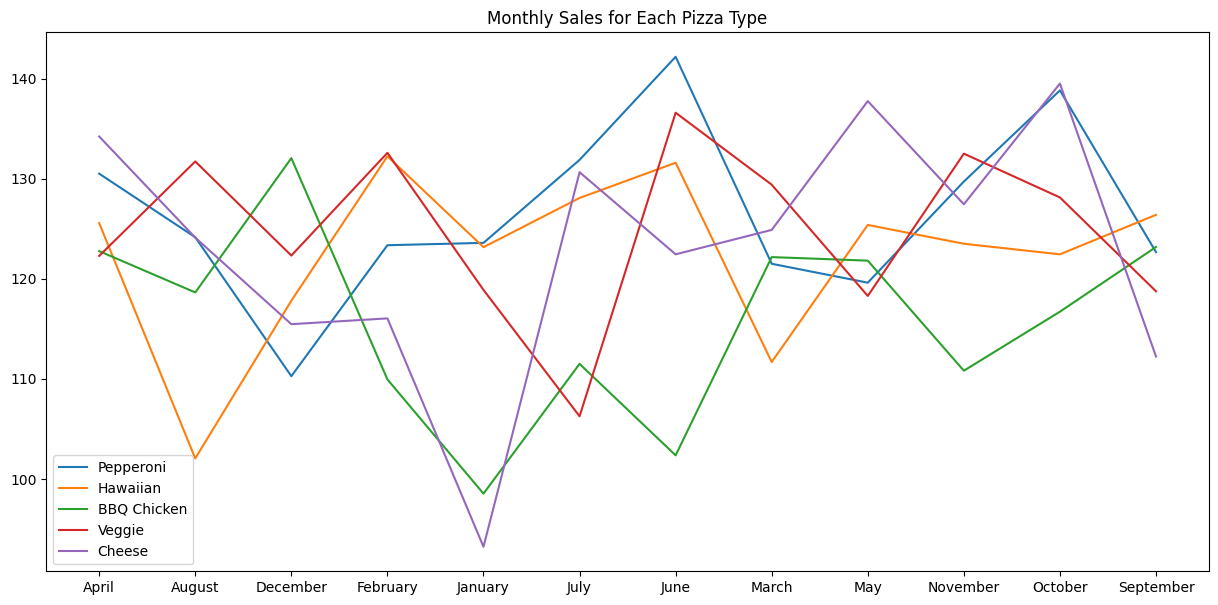

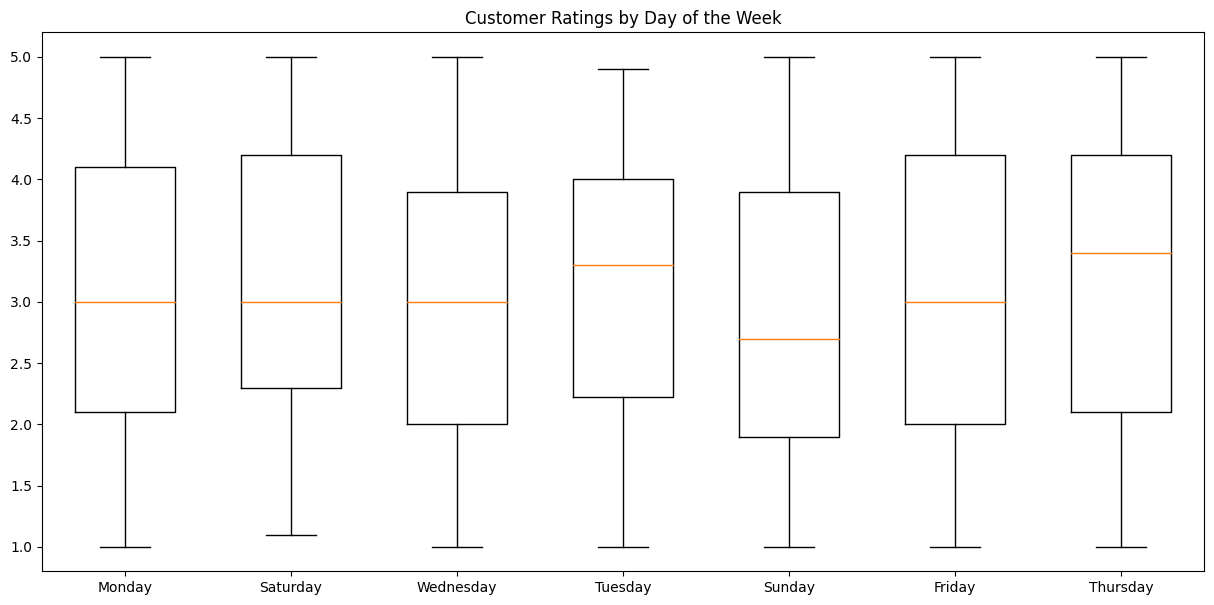

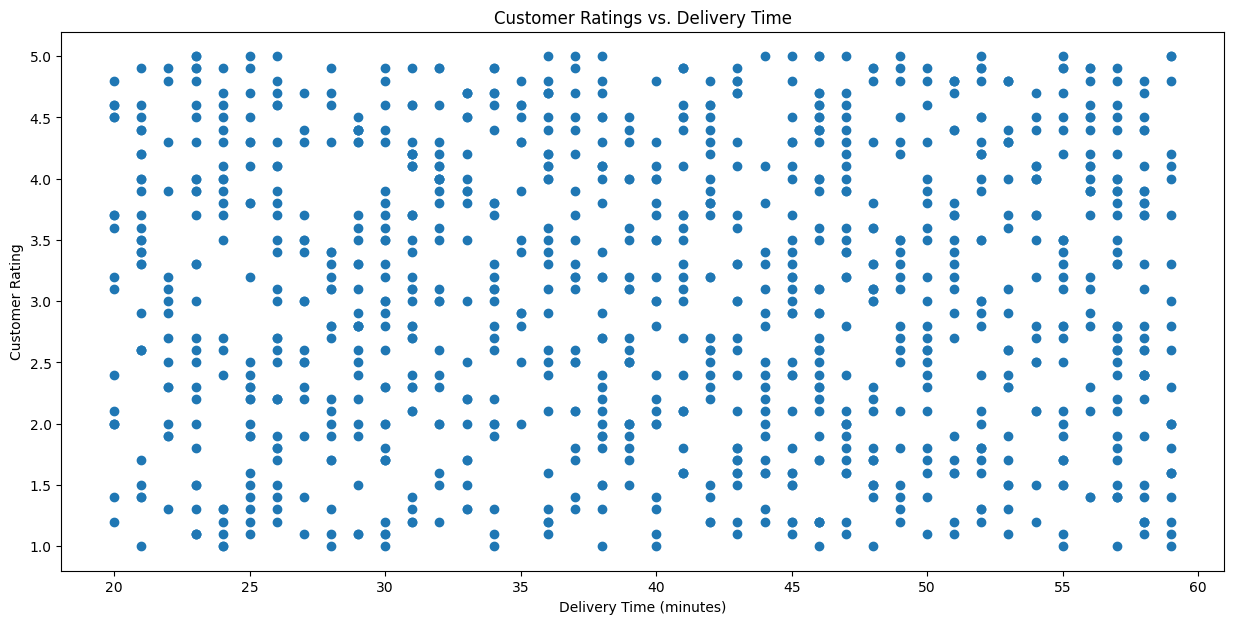

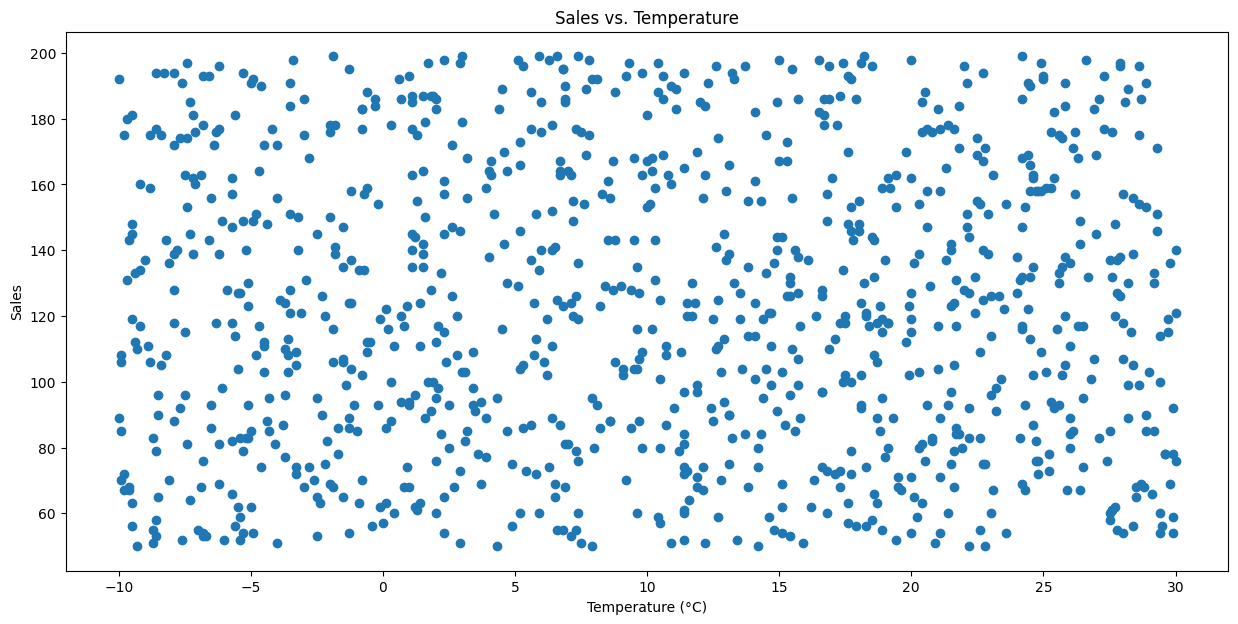

In [4]:
import matplotlib.pyplot as plt

# Load the data
sales_data = pd.read_csv('sales_data.csv')

# Plot sales over each month of the year for each pizza type
plt.figure(figsize=(15, 7))
for pizza_type in sales_data['Pizza Type'].unique():
    monthly_sales = sales_data[sales_data['Pizza Type'] == pizza_type].groupby('Month')['Sales'].mean()
    plt.plot(monthly_sales.index, monthly_sales, label=pizza_type)
plt.title('Monthly Sales for Each Pizza Type')
plt.legend()
plt.show()

# Plot customer ratings by day of the week
plt.figure(figsize=(15, 7))
for weekday in sales_data['Weekday'].unique():
    ratings = sales_data[sales_data['Weekday'] == weekday]['Customer Rating']
    plt.boxplot(ratings, positions=[list(sales_data['Weekday'].unique()).index(weekday)], widths=0.6)
plt.xticks(ticks=range(len(sales_data['Weekday'].unique())), labels=sales_data['Weekday'].unique())
plt.title('Customer Ratings by Day of the Week')
plt.show()

# Plot customer ratings vs. delivery time
plt.figure(figsize=(15, 7))
plt.scatter(sales_data['Delivery Time (minutes)'], sales_data['Customer Rating'])
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')
plt.title('Customer Ratings vs. Delivery Time')
plt.show()

# Plot sales vs. temperature
plt.figure(figsize=(15, 7))
plt.scatter(sales_data['Temperature (°C)'], sales_data['Sales'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.title('Sales vs. Temperature')
plt.show()


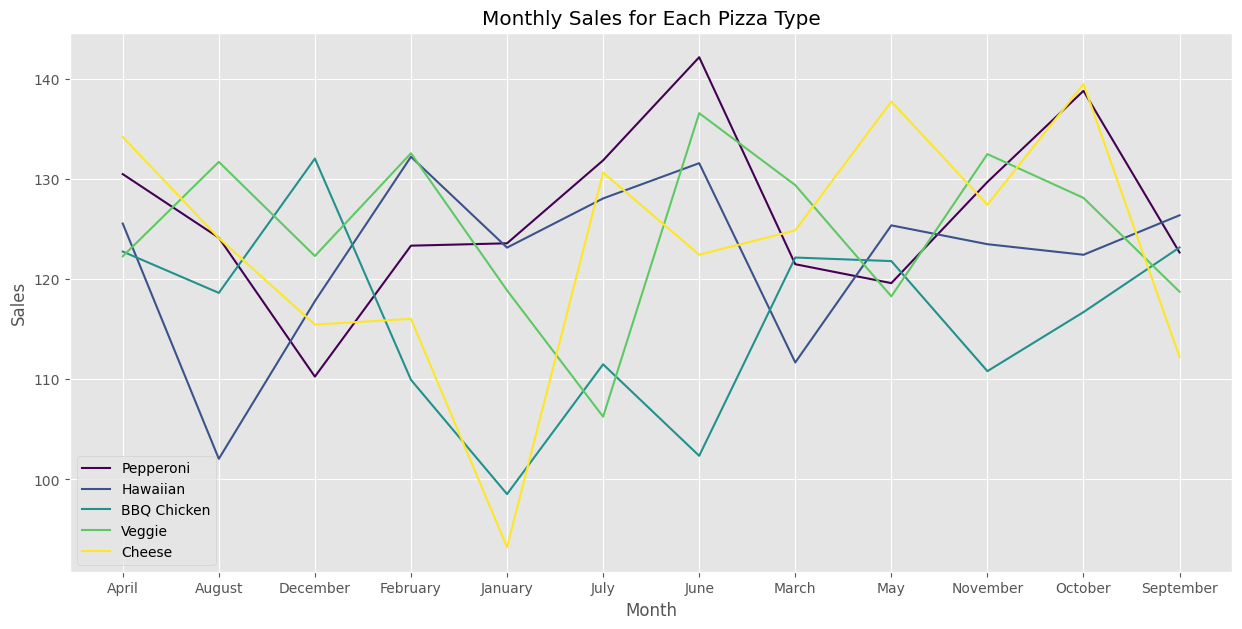

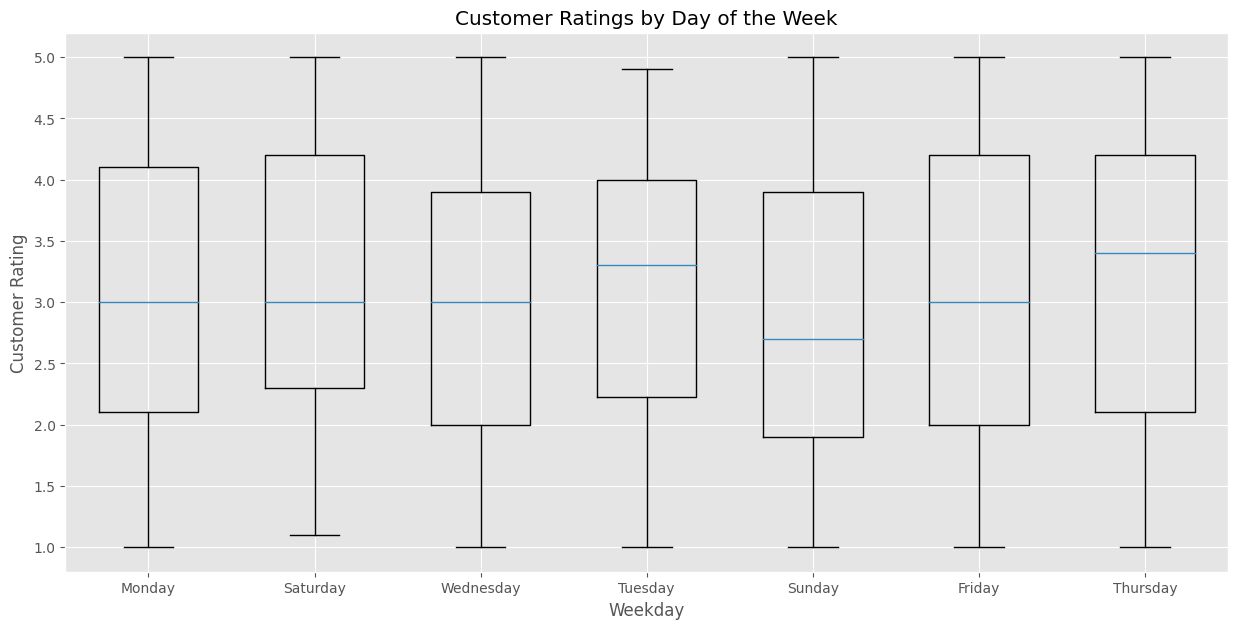

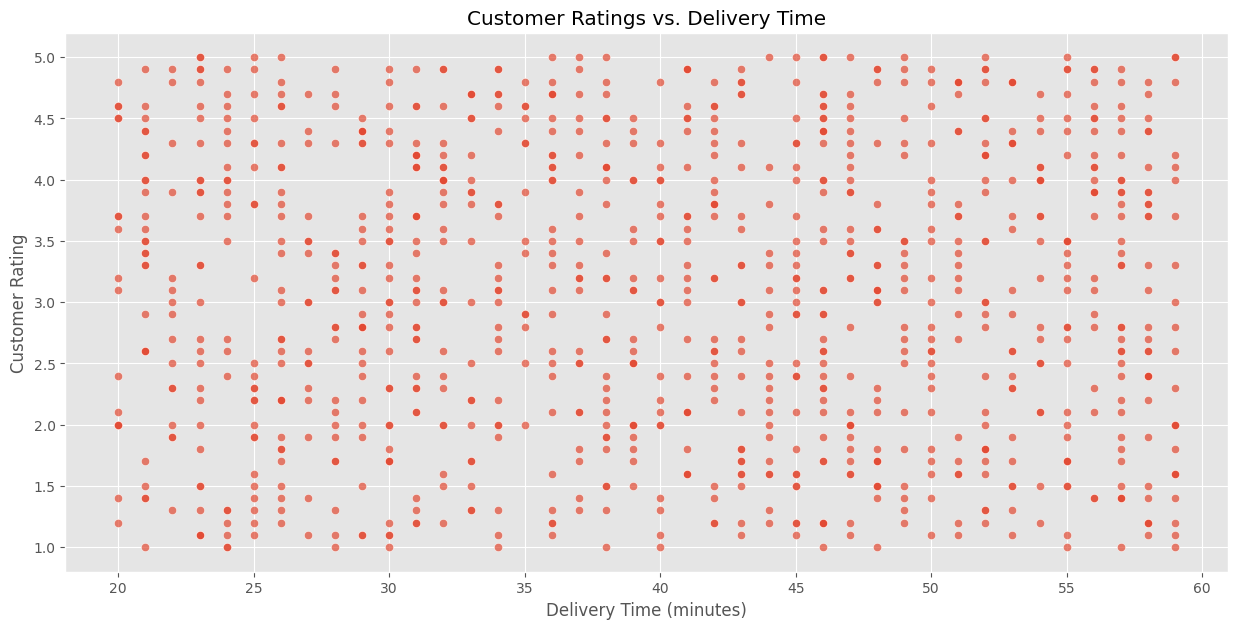

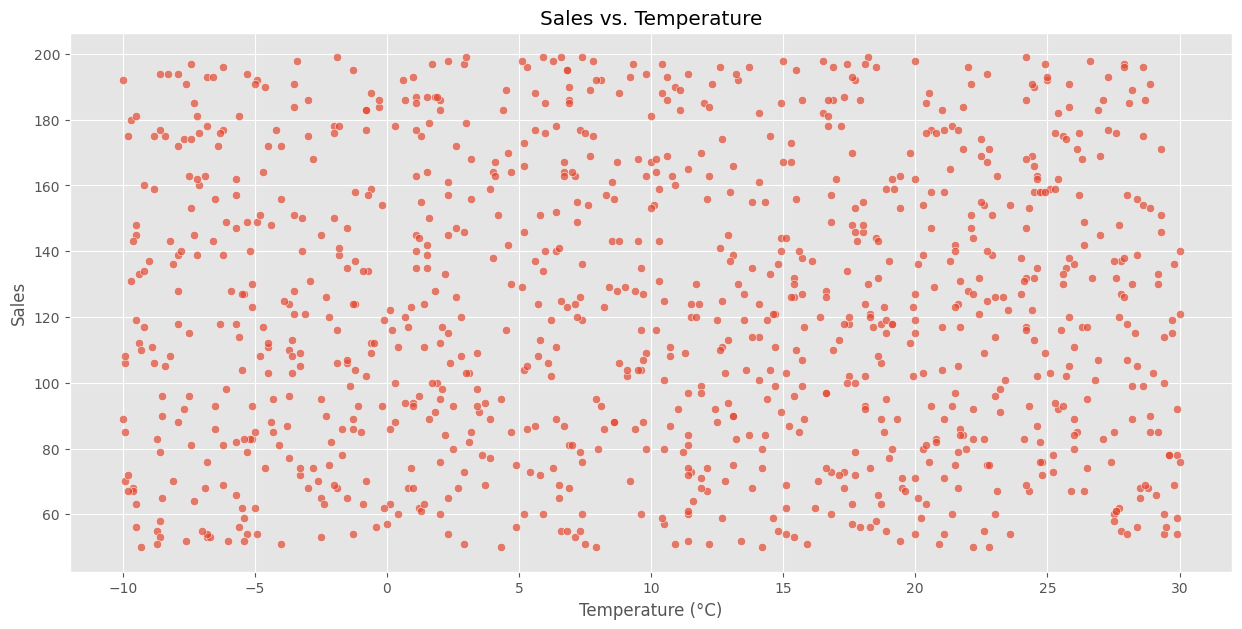

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
sales_data = pd.read_csv('sales_data.csv')

# Remove rows with NaN values
sales_data = sales_data.dropna()

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Plot sales over each month of the year for each pizza type
plt.figure(figsize=(15, 7))
colors = plt.cm.viridis(np.linspace(0, 1, len(sales_data['Pizza Type'].unique())))
for pizza_type, color in zip(sales_data['Pizza Type'].unique(), colors):
    monthly_sales = sales_data[sales_data['Pizza Type'] == pizza_type].groupby('Month')['Sales'].mean()
    plt.plot(monthly_sales.index, monthly_sales, label=pizza_type, color=color)
plt.title('Monthly Sales for Each Pizza Type')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

# Plot customer ratings by day of the week
plt.figure(figsize=(15, 7))
for weekday in sales_data['Weekday'].unique():
    ratings = sales_data[sales_data['Weekday'] == weekday]['Customer Rating']
    plt.boxplot(ratings, positions=[list(sales_data['Weekday'].unique()).index(weekday)], widths=0.6)
plt.xticks(ticks=range(len(sales_data['Weekday'].unique())), labels=sales_data['Weekday'].unique())
plt.title('Customer Ratings by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.show()

# Plot customer ratings vs. delivery time
plt.figure(figsize=(15, 7))
plt.scatter(sales_data['Delivery Time (minutes)'], sales_data['Customer Rating'], alpha=0.7, edgecolors='w', linewidths=0.5)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')
plt.title('Customer Ratings vs. Delivery Time')
plt.grid(True)
plt.show()

# Plot sales vs. temperature
plt.figure(figsize=(15, 7))
plt.scatter(sales_data['Temperature (°C)'], sales_data['Sales'], alpha=0.7, edgecolors='w', linewidths=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.title('Sales vs. Temperature')
plt.grid(True)
plt.show()

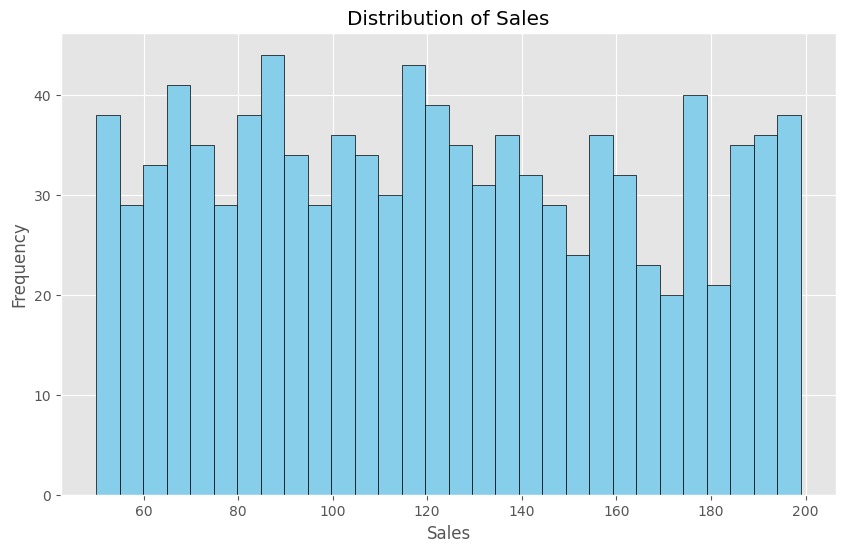

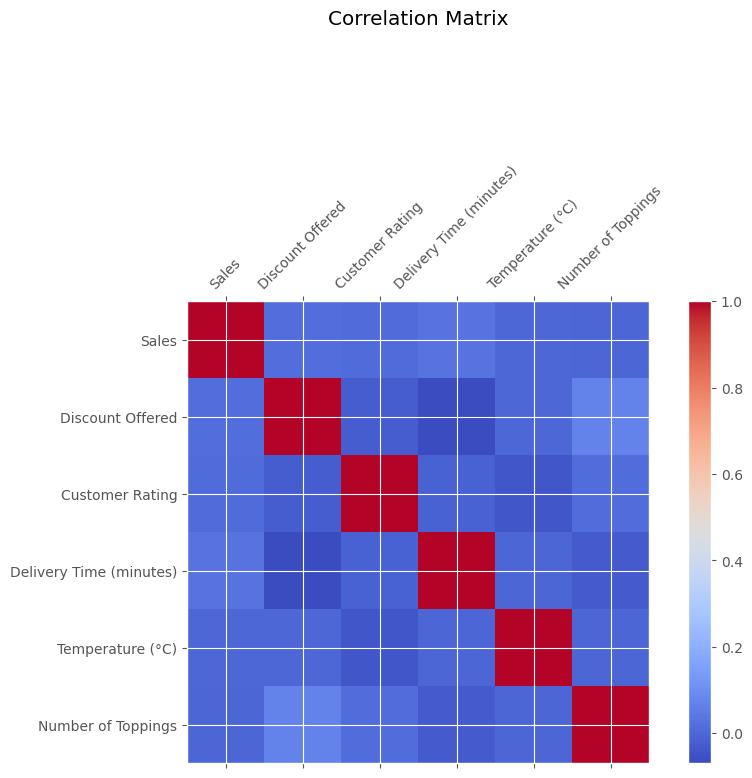

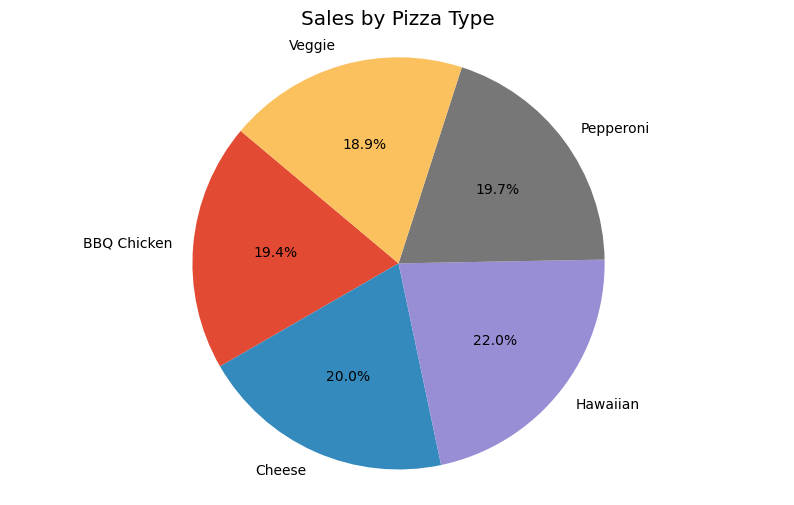

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
sales_data = pd.read_csv('sales_data.csv')

# Remove rows with NaN values
sales_data = sales_data.dropna()

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Histogram of Sales
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Matrix
correlation_matrix = sales_data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=100)
plt.show()

# Pie Chart of Sales by Pizza Type
sales_by_pizza = sales_data.groupby('Pizza Type')['Sales'].sum()
plt.figure(figsize=(10, 6))
plt.pie(sales_by_pizza, labels=sales_by_pizza.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Pizza Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



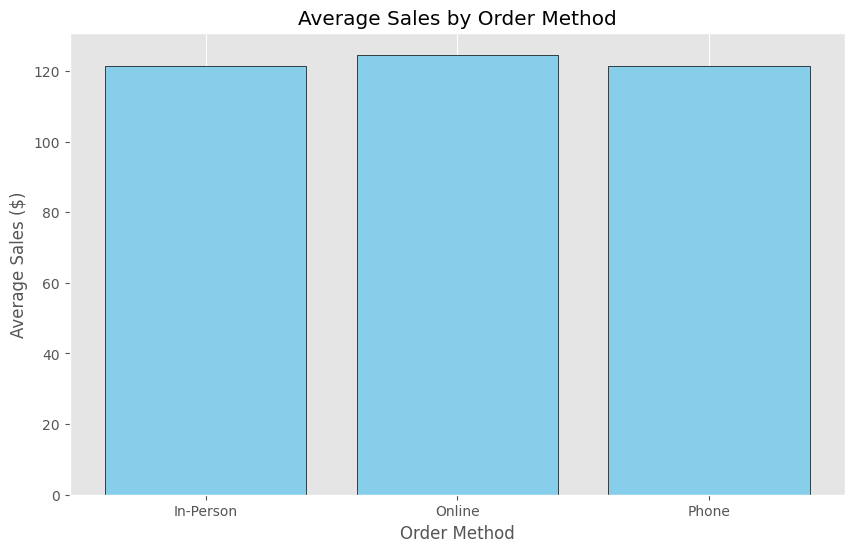

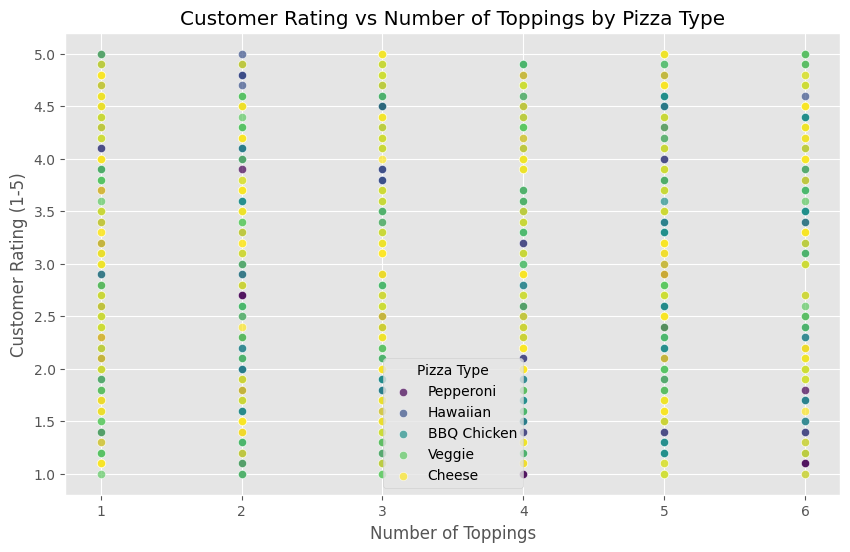

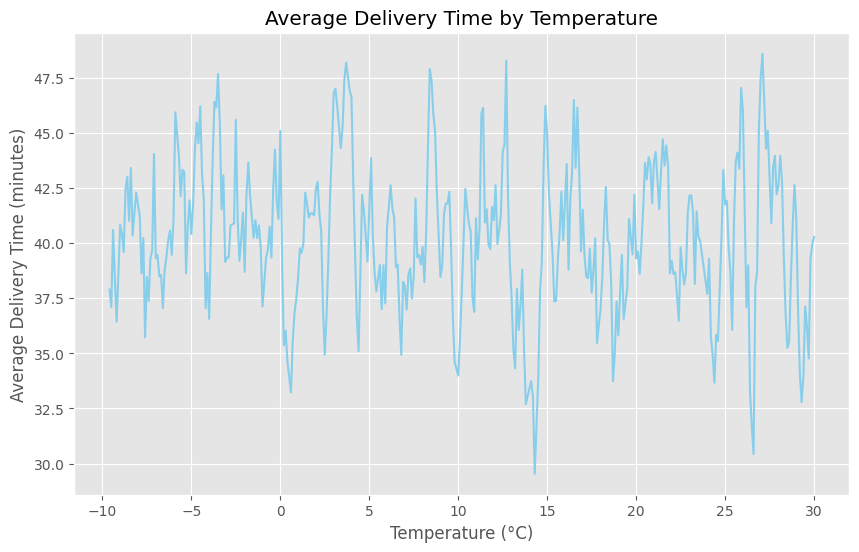

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data
sales_data = pd.read_csv('sales_data.csv')

# Remove rows with NaN values
sales_data = sales_data.dropna()

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Bar Chart of Average Sales by Order Method
avg_sales_by_order_method = sales_data.groupby('Order Method')['Sales'].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_by_order_method.index, avg_sales_by_order_method, color='skyblue', edgecolor='black')
plt.title('Average Sales by Order Method')
plt.xlabel('Order Method')
plt.ylabel('Average Sales ($)')
plt.grid(axis='y')
plt.show()

# Scatter Plot of Customer Rating vs Number of Toppings
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(sales_data['Pizza Type'].unique())))
for pizza_type, color in zip(sales_data['Pizza Type'].unique(), colors):
    data = sales_data[sales_data['Pizza Type'] == pizza_type]
    plt.scatter(data['Number of Toppings'], data['Customer Rating'], color=color, alpha=0.7, edgecolors='w', linewidths=0.5, label=pizza_type)
plt.title('Customer Rating vs Number of Toppings by Pizza Type')
plt.xlabel('Number of Toppings')
plt.ylabel('Customer Rating (1-5)')
plt.grid(True)
plt.legend(title='Pizza Type')
plt.show()

# Line Plot of Average Delivery Time by Temperature
avg_delivery_time_by_temp = sales_data.groupby('Temperature (°C)')['Delivery Time (minutes)'].mean().rolling(window=5).mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_delivery_time_by_temp.index, avg_delivery_time_by_temp, color='skyblue')
plt.title('Average Delivery Time by Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Delivery Time (minutes)')
plt.grid(True)
plt.show()
